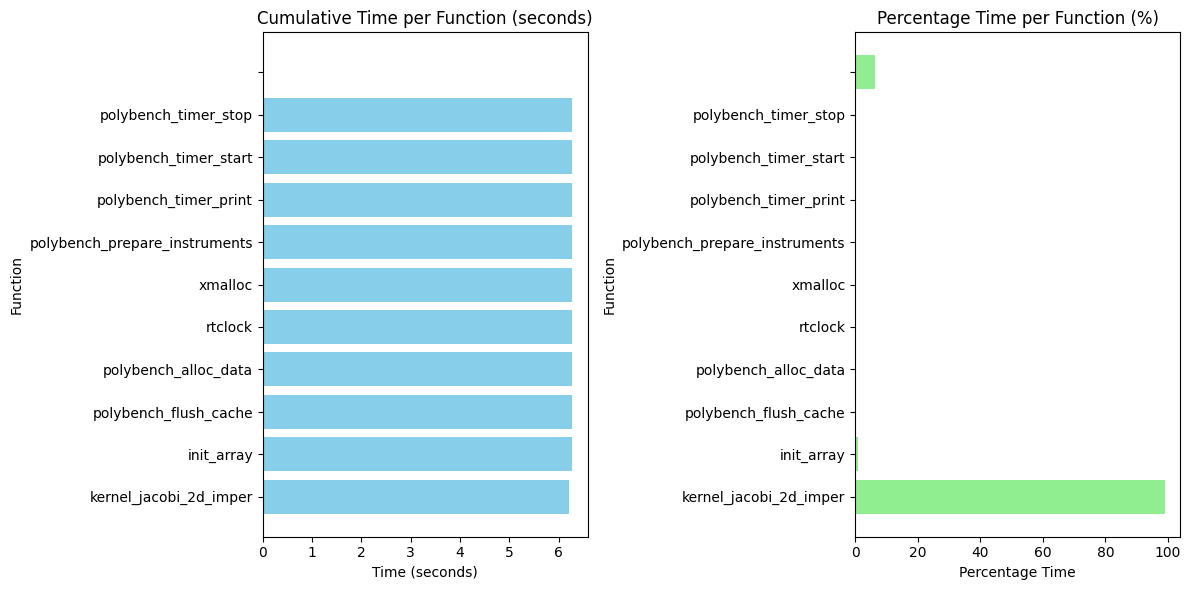

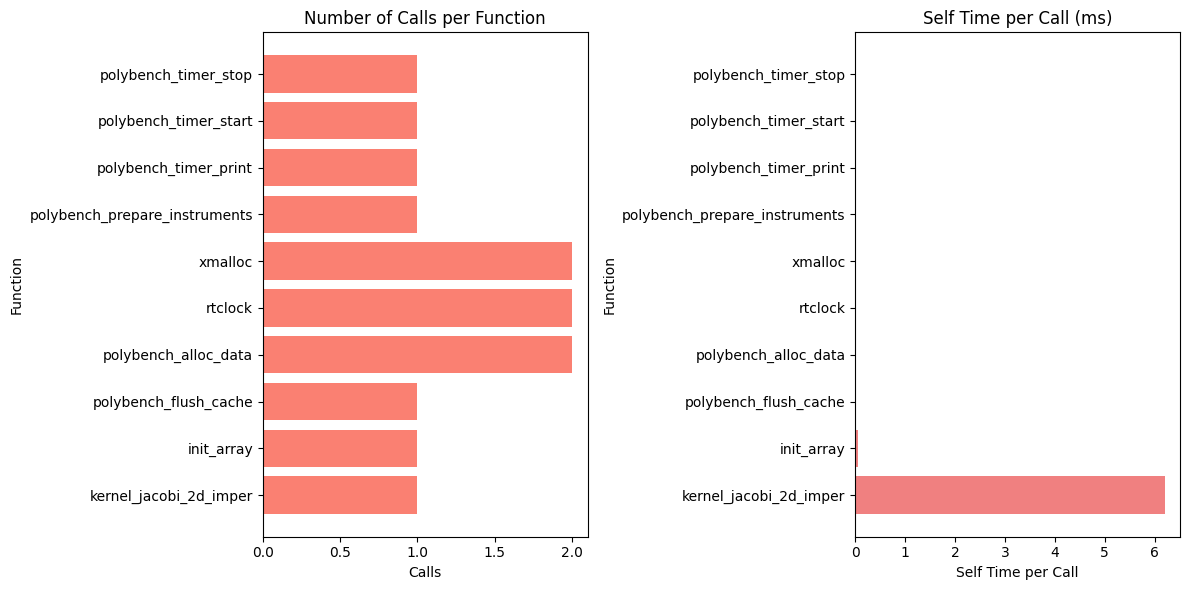

Potential Parallelization Candidates:
                   function_name  cumulative_seconds  calls
2          polybench_flush_cache                6.27    1.0
3           polybench_alloc_data                6.27    2.0
4                        rtclock                6.27    2.0
5                        xmalloc                6.27    2.0
6  polybench_prepare_instruments                6.27    1.0
7          polybench_timer_print                6.27    1.0
8          polybench_timer_start                6.27    1.0
9           polybench_timer_stop                6.27    1.0
1                     init_array                6.26    1.0
0         kernel_jacobi_2d_imper                6.20    1.0
Potential CPU-bound Functions:
            function_name  self_seconds
0  kernel_jacobi_2d_imper          6.20
1              init_array          0.06


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# Load the JSON data
with open('profiling_large_sequential.json', 'r') as f:
    data = f.read()
profile_data = json.loads(data)

# Convert the data into a DataFrame for easier manipulation
flat_profile = profile_data["flat_profile"]
df = pd.DataFrame(flat_profile)

# Convert the relevant columns to numeric values for analysis
df['percentage_time'] = pd.to_numeric(df['percentage_time'], errors='coerce')
df['cumulative_seconds'] = pd.to_numeric(df['cumulative_seconds'], errors='coerce')
df['self_seconds'] = pd.to_numeric(df['self_seconds'], errors='coerce')
df['calls'] = pd.to_numeric(df['calls'], errors='coerce')
df['self_time_per_call'] = pd.to_numeric(df['self_time_per_call'], errors='coerce')

# Plot Time Spent on Each Function (Cumulative Seconds and Percentage Time)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Cumulative Time Plot
ax[0].barh(df['function_name'], df['cumulative_seconds'], color='skyblue')
ax[0].set_title('Cumulative Time per Function (seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Function')

# Percentage Time Plot
ax[1].barh(df['function_name'], df['percentage_time'], color='lightgreen')
ax[1].set_title('Percentage Time per Function (%)')
ax[1].set_xlabel('Percentage Time')
ax[1].set_ylabel('Function')

plt.tight_layout()
plt.show()

# Plot Calls and Self Time per Call
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for number of calls
ax[0].barh(df['function_name'], df['calls'], color='salmon')
ax[0].set_title('Number of Calls per Function')
ax[0].set_xlabel('Calls')
ax[0].set_ylabel('Function')

# Plot for self time per call
ax[1].barh(df['function_name'], df['self_time_per_call'], color='lightcoral')
ax[1].set_title('Self Time per Call (ms)')
ax[1].set_xlabel('Self Time per Call')
ax[1].set_ylabel('Function')

plt.tight_layout()
plt.show()

# Potential parallelization candidates: High cumulative time, frequent calls
potential_parallel = df[df['cumulative_seconds'] > 0.01].sort_values(by='cumulative_seconds', ascending=False)

# Displaying functions that may benefit from parallelization
print("Potential Parallelization Candidates:")
print(potential_parallel[['function_name', 'cumulative_seconds', 'calls']])

# Identifying CPU-bound functions (those with high self-time)
cpu_bound = df[df['self_seconds'] > 0.01].sort_values(by='self_seconds', ascending=False)

# Displaying CPU-bound functions
print("Potential CPU-bound Functions:")
print(cpu_bound[['function_name', 'self_seconds']])
